# PFM: Exploratory Data Analysis Electricity SNP 

En este documento se lleva a cabo un EDA del dataset que reúne los parámetros meteorológicos de la isla de Tenerife. Se utiliza el lenguaje Python por su versatilidad y gran cantidad de librerías. 

El objetivo es tener una mejor comprensión de los datos y extraer conclusiones de utilidad para la posterior construcción del modelo de aprendizaje.


In [1]:
# Importamos las librerías
### Escribe aquí tu código ###
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime
import pytz
import seaborn as sns

# Librerias pickle y csv
import pickle
import csv


## **1. Abrir el dataset**

A continuación abrimos el dataset ya limpio, previamente guardado en formato pickle. 

In [2]:
def load_obj(name ):
       with open('obj/' + name + '.pkl', 'rb') as f:
           return pickle.load(f)

dataset=load_obj('df_Tenerife_Meteo_28.14_-16.46_full_2019_clean');
leyenda=load_obj('dict_descripcion_df_Meteo');


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2019-01-01 00:00:00 to 2019-12-31 23:50:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp_Aire_ºC   52560 non-null  float64
 1   Azimuth_º      52560 non-null  float64
 2   Nubosidad_%    52560 non-null  float64
 3   Temp_Rocio_ºC  52560 non-null  float64
 4   DHI_Wm2        52560 non-null  float64
 5   DNI_Wm2        52560 non-null  float64
 6   EBH_Wm2        52560 non-null  float64
 7   GHI_Wm2        52560 non-null  float64
 8   GTI_FT_Wm2     52560 non-null  float64
 9   GTI_TR_Wm2     52560 non-null  float64
 10  TPW_Kgm2       52560 non-null  float64
 11  RH_%           52560 non-null  float64
 12  WD_10m_º       52560 non-null  float64
 13  WS_10m_ms      52560 non-null  float64
 14  Zenith_º       52560 non-null  float64
dtypes: float64(15)
memory usage: 6.4 MB


In [4]:
dataset.describe()

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,DHI_Wm2,DNI_Wm2,EBH_Wm2,GHI_Wm2,GTI_FT_Wm2,GTI_TR_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,18.629581,0.041001,6.589996,12.648796,79.291686,260.273668,164.534342,243.825247,261.477645,311.807249,16.125325,69.661440,68.702987,5.916153,89.747260
std,2.798637,98.223910,14.326190,2.655090,117.175923,354.960690,263.461755,322.748404,347.072080,388.585274,4.956180,12.983715,81.393103,2.537987,41.723464
min,11.900000,-180.000000,0.000000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000,21.100000,0.000000,0.000000,5.000000
25%,16.900000,-90.000000,0.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.900000,63.200000,30.000000,4.200000,54.000000
50%,18.100000,0.000000,0.000000,12.900000,4.000000,0.000000,0.000000,5.000000,5.000000,4.000000,15.600000,72.300000,41.000000,6.100000,90.000000
75%,20.000000,90.000000,3.800000,14.300000,117.000000,605.000000,277.000000,480.000000,520.000000,698.000000,18.400000,79.100000,57.000000,7.700000,125.000000
max,31.100000,180.000000,99.100000,18.900000,658.000000,1014.000000,997.000000,1090.000000,1110.000000,1092.000000,40.500000,95.600000,360.000000,14.300000,175.000000


In [5]:
dataset

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,DHI_Wm2,DNI_Wm2,EBH_Wm2,GHI_Wm2,GTI_FT_Wm2,GTI_TR_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,,,,,,
2019-01-01 00:00:00,16.7,77.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,8.2,54.6,119.0,3.5,163.0
2019-01-01 00:10:00,16.7,74.0,0.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,8.2,54.4,118.0,3.5,165.0
2019-01-01 00:20:00,16.8,70.0,0.0,7.7,0.0,0.0,0.0,0.0,0.0,0.0,8.1,54.8,117.0,3.5,167.0
2019-01-01 00:30:00,17.0,65.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1,55.4,115.0,3.6,169.0
2019-01-01 00:40:00,17.1,57.0,0.0,8.2,0.0,0.0,0.0,0.0,0.0,0.0,8.0,55.9,114.0,3.6,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,14.0,87.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,5.7,53.8,40.0,2.9,152.0
2019-12-31 23:20:00,13.9,85.0,0.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,5.8,52.7,41.0,2.9,154.0
2019-12-31 23:30:00,13.9,84.0,0.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,5.8,51.5,42.0,3.0,156.0


## **2. Visualizar los datos**

Existen varias maneras visuales de interpretar los datos de entrada. En este caso se escojen las curvas de densidad. 

**1. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Los picos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

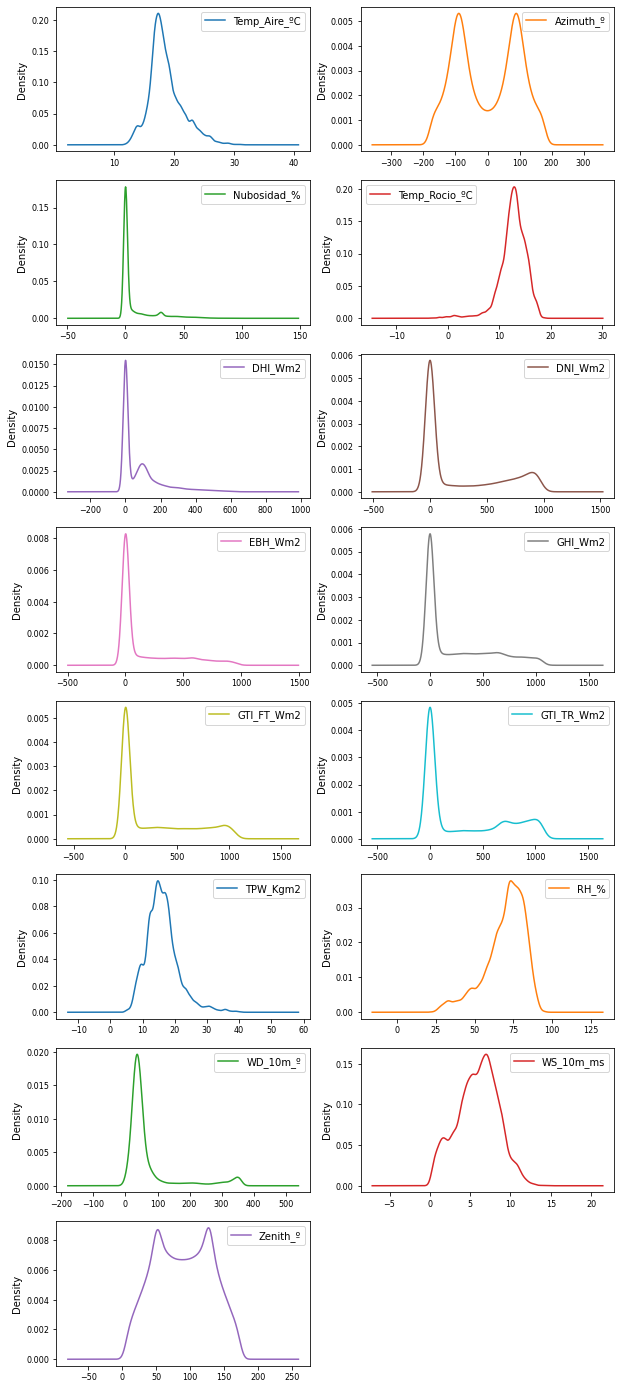

In [6]:
### Escribe aquí tu código ###
density = dataset.plot(kind='kde', subplots=True, legend=True , layout=(8, 2), figsize=(10, 25), sharex=False,
                        fontsize=8, stacked=True)

plt.savefig('fig/' + 'Density_df_meteo_V1.png', dpi=200)

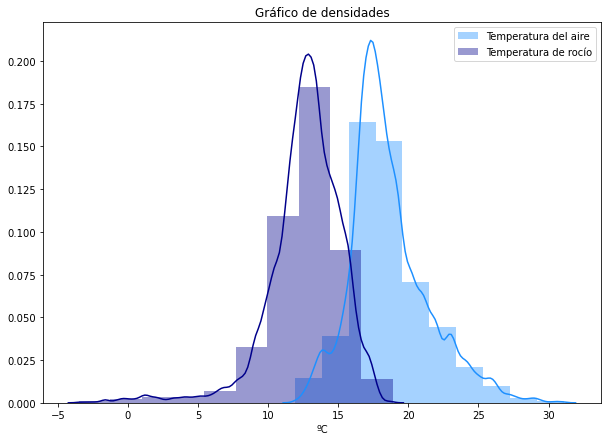

In [7]:
# Temperatura Aire, Temperatura Rocío
plt.figure(figsize=(10,7))
vis1 = sns.distplot(dataset["Temp_Aire_ºC"],bins=10, color='dodgerblue', label='Temperatura del aire')
vis2 = sns.distplot(dataset["Temp_Rocio_ºC"],bins=10, axlabel='ºC', color='darkblue', label='Temperatura de rocío')
plt.title('Gráfico de densidades')
plt.legend(loc='best')

plt.savefig('fig/' + 'WindTemp_VS_DewTemp.png', dpi=200)

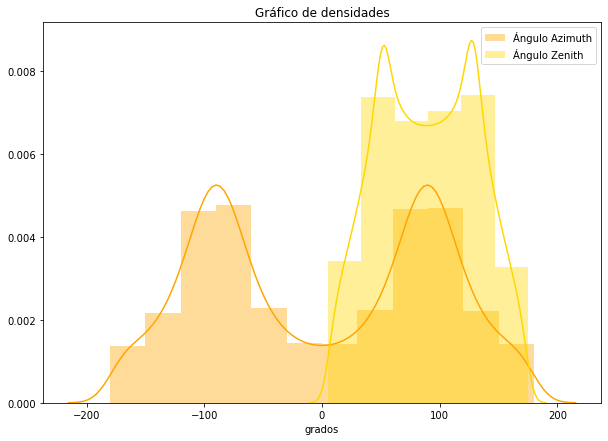

In [8]:
## Ángulo Azimuth, Ángulo Zenith
plt.figure(figsize=(10,7))
vis1 = sns.distplot(dataset["Azimuth_º"],bins=12, color='orange', label='Ángulo Azimuth')
vis2 = sns.distplot(dataset["Zenith_º"],bins=6, axlabel='grados', color='gold', label='Ángulo Zenith')
plt.title('Gráfico de densidades')
plt.legend(loc='best')

plt.savefig('fig/' + 'Azimuth_VS_Zenith.png', dpi=200)

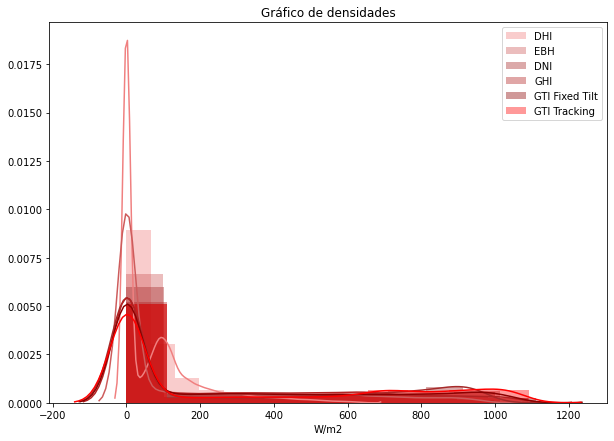

In [9]:
# DHI, DNI, EBH, GHI, GTI Fixed Tilt, GTI Tracking
plt.figure(figsize=(10,7))
vis1 = sns.distplot(dataset["DHI_Wm2"],bins=10, color='lightcoral', label='DHI')
vis2 = sns.distplot(dataset["EBH_Wm2"],bins=10, color='indianred', label='EBH')
vis3 = sns.distplot(dataset["DNI_Wm2"],bins=10, color='brown', label='DNI')
vis4 = sns.distplot(dataset["GHI_Wm2"],bins=10, color='firebrick', label='GHI')
vis5 = sns.distplot(dataset["GTI_FT_Wm2"],bins=10, color='darkred', label='GTI Fixed Tilt')
vis6 = sns.distplot(dataset["GTI_TR_Wm2"],bins=10, axlabel='W/m2', color='red', label='GTI Tracking')
plt.title('Gráfico de densidades')
plt.legend(loc='best')

plt.savefig('fig/' + 'Solar_Irradiation_Comparison.png', dpi=200)

Como se puede observar, todas las variables siguen una distribución muy similar. Pues todas ellas son componentes de la irradiancia solar que llega a la atmósfera del globo terrestre.

Se considera de interés utilizar la irradiancia total recibida en una superficie horizontal para la construcción de nuestro modelo de aprendizaje. De este modo se eliminan el resto de variables de irradiancia solar. 

In [10]:
dataset=dataset.drop(['DHI_Wm2','EBH_Wm2','DNI_Wm2','GTI_FT_Wm2','GTI_TR_Wm2'],axis=1)

dataset

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-01-01 00:00:00,16.7,77.0,0.0,7.5,0.0,8.2,54.6,119.0,3.5,163.0
2019-01-01 00:10:00,16.7,74.0,0.0,7.4,0.0,8.2,54.4,118.0,3.5,165.0
2019-01-01 00:20:00,16.8,70.0,0.0,7.7,0.0,8.1,54.8,117.0,3.5,167.0
2019-01-01 00:30:00,17.0,65.0,0.0,8.0,0.0,8.1,55.4,115.0,3.6,169.0
2019-01-01 00:40:00,17.1,57.0,0.0,8.2,0.0,8.0,55.9,114.0,3.6,171.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,14.0,87.0,0.0,4.7,0.0,5.7,53.8,40.0,2.9,152.0
2019-12-31 23:20:00,13.9,85.0,0.0,4.4,0.0,5.8,52.7,41.0,2.9,154.0
2019-12-31 23:30:00,13.9,84.0,0.0,4.1,0.0,5.8,51.5,42.0,3.0,156.0


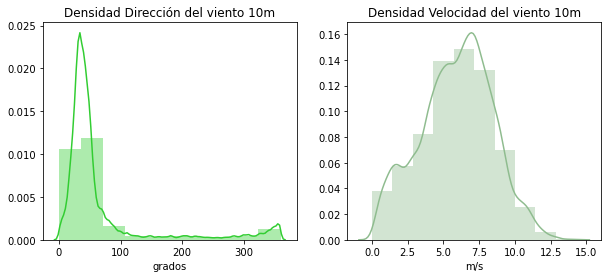

In [11]:
## Dirección del viento, Velocidad del viento
f, ax = plt.subplots(1,2,sharex=False, sharey=False, figsize=(10,4))
vis1 = sns.distplot(dataset["WD_10m_º"],bins=10, ax= ax[0], axlabel='grados', color='limegreen')
ax[0].set_title('Densidad Dirección del viento 10m')
vis2 = sns.distplot(dataset["WS_10m_ms"],bins=10, ax=ax[1], axlabel='m/s', color='darkseagreen')
ax[1].set_title('Densidad Velocidad del viento 10m');

plt.savefig('fig/' + 'WindDirection_VS_WindSpeed.png', dpi=200)

**2. Matriz de correlación** 

La matriz de correlación es una tabla de doble entrada que muestra una lista multivariable horizontalmente y la misma lista verticalmente y con el correspondiente coeficiente de correlación llamado r o la relación entre cada pareja en cada celda, expresada con un número que va desde 0 a 1. El modelo mide y muestra la interdependencia en relaciones asociadas o entre cada pareja de variables y todas al mismo tiempo.

* **¿Qué variable no tiene ninguna correlación con ningún atributo?** 

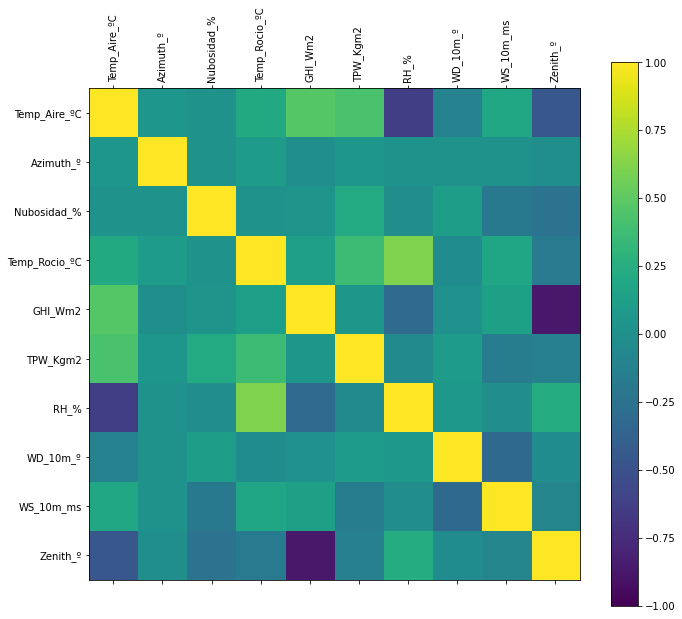

In [12]:
# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='pearson') 


# Matriz de correlación (Descomentar cuando se ejecute)

fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
plt.show()

**3. ¿Existen outliers? De ser así, analizarlos y tratarlos** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Qué atributo llama la atención por sus valores atípicos?**

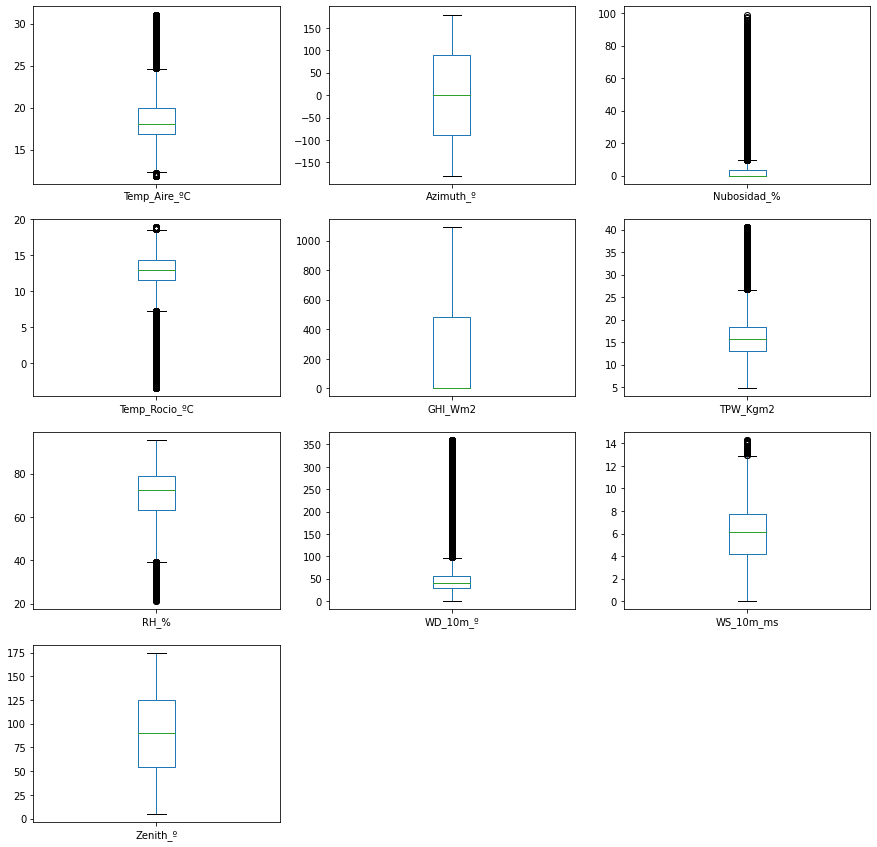

In [13]:
### Escribe aquí tu código ###
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 15), sharex=False,
                                 sharey=False, fontsize=10)

plt.savefig('fig/' + 'Boxplot_df_meteo_V4.png', dpi=200)

Pese a la existencia de outliers en algunos de los atributos del dataset, los límites superior e inferior de los atributos son razonables y tienen sentido por lo que no se consideran datos erróneos. Se decide conservar todos los valores del dataset, pues es interesante analizar estos outliers ya que representan escenarios puntuales que no por ello se deben menospreciar.

In [14]:
#Creamos una función para la detección de outliers con los cuantiles inferiores y superiores deseados

def groupby_outliers(df_in, col_name, qinf=0.25, qsup=0.75):
       q1 = df_in[col_name].quantile(qinf)
       q3 = df_in[col_name].quantile(qsup)
       iqr = q3-q1 #Interquartile range
       fence_low = q1-1.5*iqr
       fence_high = q3+1.5*iqr
       df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
       return df_out

#Detectamos los outliers de 'demanda real suma de generación SNP' y los analizamos.

outliers1 = groupby_outliers(dataset, "Temp_Aire_ºC", 0.3, 0.7)
outliers1.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-09-25 12:40:00,23.5,-169.0,0.8,11.3,942.0,13.5,46.3,49.0,7.1,29.0
2019-07-22 13:40:00,24.6,144.0,0.0,13.2,1053.0,14.6,48.9,50.0,8.0,9.0
2019-07-18 14:10:00,22.9,117.0,0.0,11.5,1043.0,14.0,48.7,51.0,7.9,14.0
2019-08-07 17:00:00,24.4,90.0,0.0,14.0,591.0,17.2,52.4,50.0,6.7,52.0
2019-08-29 18:00:00,24.5,90.0,0.0,13.1,277.0,17.5,49.1,40.0,7.0,70.0
2019-12-17 03:10:00,13.2,-87.0,0.0,7.8,0.0,16.9,69.6,274.0,0.8,152.0
2019-08-19 01:00:00,25.7,5.0,0.0,14.2,0.0,21.1,49.0,50.0,11.2,138.0
2019-12-15 22:30:00,13.3,91.0,0.0,9.0,0.0,12.2,75.1,283.0,2.6,145.0
2019-12-13 05:30:00,12.0,-101.0,0.0,7.0,0.0,6.2,71.5,32.0,6.8,121.0


In [15]:
outliers2 = groupby_outliers(dataset, "Nubosidad_%", 0.2, 0.8)
outliers2.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-01-30 15:20:00,16.7,145.0,47.9,13.0,322.0,13.5,78.9,23.0,6.8,54.0
2019-03-18 03:50:00,16.7,-60.0,30.5,14.3,0.0,12.1,85.6,35.0,8.8,135.0
2019-12-26 09:40:00,17.8,-130.0,67.4,5.7,57.0,12.2,44.8,38.0,5.8,72.0
2019-07-06 07:20:00,17.8,-70.0,21.7,14.0,126.0,14.1,78.1,36.0,4.3,78.0
2019-05-16 04:50:00,18.5,-56.0,30.9,16.2,0.0,16.7,86.4,19.0,5.5,108.0
2019-03-25 01:10:00,16.5,4.0,46.7,12.5,0.0,18.6,77.2,191.0,2.4,151.0
2019-01-29 18:50:00,17.3,110.0,30.5,13.3,1.0,15.3,77.1,41.0,8.9,92.0
2019-09-17 06:50:00,20.8,-86.0,23.0,14.3,0.0,30.0,66.6,39.0,4.9,92.0
2019-12-25 07:00:00,15.8,-110.0,31.5,0.1,0.0,11.1,34.3,59.0,1.2,103.0


In [16]:
outliers3 = groupby_outliers(dataset, "Temp_Rocio_ºC", 0.2, 0.8)
outliers3.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-12-27 04:20:00,15.3,-95.0,0.0,1.3,0.0,8.2,38.7,35.0,4.4,137.0
2019-12-30 14:10:00,19.9,163.0,3.1,2.7,625.0,6.5,32.0,60.0,4.9,53.0
2019-07-25 09:20:00,25.2,-85.0,0.0,4.3,579.0,8.9,26.1,41.0,5.5,54.0
2019-12-27 12:40:00,20.9,-171.0,0.0,3.1,633.0,9.2,30.9,103.0,2.8,52.0
2019-07-25 07:00:00,19.8,-70.0,4.0,4.7,55.0,9.0,37.0,26.0,5.4,84.0
2019-12-25 06:10:00,15.5,-105.0,46.0,0.7,0.0,10.9,36.5,88.0,0.9,113.0
2019-12-28 03:30:00,16.4,-89.0,0.0,1.0,0.0,9.4,35.1,40.0,3.9,149.0
2019-12-27 15:10:00,20.9,148.0,0.0,3.4,520.0,9.2,31.7,101.0,2.3,59.0
2019-12-27 21:30:00,17.2,98.0,0.0,3.6,0.0,8.9,40.2,36.0,4.0,130.0


In [17]:
outliers4 = groupby_outliers(dataset,"TPW_Kgm2", 0.2, 0.8)
outliers4.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-08-10 04:30:00,21.1,-53.0,0.0,14.1,0.0,30.8,64.4,27.0,4.2,116.0
2019-08-09 21:10:00,22.2,61.0,0.0,15.3,0.0,31.2,65.0,39.0,4.6,106.0
2019-09-22 10:40:00,21.7,-122.0,0.1,17.0,733.0,33.2,74.7,63.0,2.9,44.0
2019-08-09 16:50:00,25.2,92.0,0.0,14.2,588.0,32.0,50.6,58.0,5.7,51.0
2019-10-16 19:50:00,17.4,91.0,0.0,15.0,0.0,32.1,85.6,49.0,4.0,106.0
2019-08-09 21:50:00,22.3,55.0,0.0,14.8,0.0,30.5,62.8,37.0,4.8,113.0
2019-10-16 09:00:00,17.5,-114.0,51.3,13.3,148.0,31.3,76.5,49.0,5.5,68.0
2019-09-16 05:50:00,21.7,-78.0,0.0,14.8,0.0,37.2,64.8,20.0,1.6,105.0
2019-09-16 02:00:00,20.3,-25.0,0.0,13.2,0.0,32.5,63.5,18.0,2.6,146.0


In [18]:
outliers5 = groupby_outliers(dataset, "RH_%", 0.2, 0.8)
outliers5.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-10-02 16:30:00,28.4,113.0,0.0,7.4,467.0,17.8,26.5,48.0,6.0,59.0
2019-10-02 11:10:00,28.5,-135.0,0.9,6.1,741.0,18.4,24.1,56.0,7.0,41.0
2019-12-25 11:10:00,20.2,-148.0,15.6,1.3,400.0,13.2,28.5,58.0,2.6,59.0
2019-12-30 23:30:00,16.5,84.0,24.6,-2.4,0.0,5.1,27.3,33.0,5.5,156.0
2019-07-25 10:50:00,25.8,-96.0,0.0,5.9,865.0,10.1,28.0,53.0,7.9,34.0
2019-08-23 11:00:00,28.2,-111.0,5.0,9.1,697.0,20.7,30.2,54.0,6.6,35.0
2019-10-02 13:30:00,29.3,166.0,2.3,6.3,841.0,17.8,23.5,56.0,7.5,32.0
2019-12-25 00:30:00,16.2,64.0,0.0,-1.9,0.0,8.2,29.0,242.0,1.2,170.0
2019-07-25 09:10:00,25.0,-84.0,0.0,4.3,542.0,8.8,26.2,38.0,5.3,56.0


In [19]:
outliers6 = groupby_outliers(dataset, "WD_10m_º", 0.2, 0.8)
outliers6.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-06-17 09:50:00,19.5,-84.0,0.0,12.0,731.0,15.3,61.6,166.0,1.7,45.0
2019-12-18 18:00:00,15.4,118.0,13.2,12.7,25.0,17.3,84.1,233.0,2.3,87.0
2019-04-02 18:50:00,16.2,89.0,20.8,13.9,72.0,21.1,86.1,287.0,4.1,82.0
2019-03-25 14:30:00,16.0,144.0,57.1,12.8,382.0,23.3,81.5,197.0,2.7,32.0
2019-10-27 06:20:00,21.1,-97.0,48.7,14.6,0.0,35.3,66.5,201.0,0.4,103.0
2019-12-23 18:50:00,16.0,113.0,0.0,9.9,0.0,9.7,67.2,242.0,0.5,97.0
2019-02-15 16:10:00,17.5,130.0,32.3,11.9,372.0,15.6,70.0,319.0,7.7,57.0
2019-12-19 01:00:00,13.7,18.0,31.0,10.5,0.0,14.8,80.7,229.0,1.2,175.0
2019-02-14 17:20:00,19.4,118.0,0.0,13.4,302.0,10.8,68.3,182.0,8.5,70.0


In [20]:
outliers7 = groupby_outliers(dataset, "WS_10m_ms", 0.25, 0.75)
outliers7.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º
PeriodEnd,,,,,,,,,,
2019-08-18 17:10:00,27.3,92.0,0.0,14.1,491.0,20.7,44.1,46.0,13.4,56.0
2019-08-18 17:30:00,27.3,90.0,0.0,14.1,417.0,20.7,44.2,46.0,13.2,61.0
2019-11-10 12:20:00,16.9,-168.0,0.7,12.1,735.0,12.1,73.1,38.0,13.1,46.0
2019-08-18 16:10:00,27.4,101.0,0.0,14.1,694.0,20.8,44.0,48.0,13.8,43.0
2019-08-18 15:10:00,27.4,113.0,0.4,14.1,845.0,20.9,43.9,49.0,14.3,31.0
2019-08-18 18:10:00,27.3,85.0,0.4,14.0,265.0,20.5,44.3,45.0,13.0,70.0
2019-08-18 17:50:00,27.3,88.0,0.0,14.1,342.0,20.6,44.2,45.0,13.1,65.0
2019-08-18 15:30:00,27.4,108.0,0.0,14.1,805.0,20.9,44.0,49.0,14.1,35.0
2019-08-18 14:30:00,27.4,126.0,0.6,14.1,911.0,20.9,44.2,49.0,13.9,23.0


## **3. EDA: Exploratory Data Analysisi**



In [21]:
# Definimos una función que nos va a servir más adelante para graficar y visualizar datos

def smart_function(ax, x, y, method, xlabel='', ylabel='', etiqueta='', title='', marker='', style='default'):
    
    if method=='plot':
        ax.plot(x,y,marker,label=etiqueta)
        ax.legend(loc='best', borderaxespad=0.05)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        return ax
    
    elif method=='bar':
        width=0.25
        ax.bar(x,y, width)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        return ax
    
    elif method == 'pie':
        #def func(pct, allvals):
         #   absolute = int(pct/100.*np.sum(allvals))
          #  return "{:.1f}%\n({:d} g)".format(pct, absolute)
        wedges, texts, autotexts = ax.pie(x, autopct='%1.1f%%',textprops=dict(color="w"))
        ax.legend(wedges, y, title=etiqueta, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts, size=8, weight="bold")
        ax.set_title(title)
        return ax
      
    else:
        print('llamar de nuevo a la función con un método válido')

### 1. Análisis estacionario dirección y velocidad del viento

In [22]:
#En primer lugar construimos nuevas columnas para la discriminación de las variables según estación, mes o dia de la semana

dataset['Month']=dataset.index.month
dataset['Weekday']=0
dataset['Season']=0

for i in range (0,len(dataset.index),1):
    dataset['Weekday'][i]=dataset.index[i].isoweekday()
    

    
seasons = {'Verano':(datetime(2019,6,21), datetime(2019,9,22)),
           'Otoño':(datetime(2019,9,23), datetime(2019,12,20)),
           'Primavera':(datetime(2019,3,21), datetime(2019,6,20))}

def get_season(date):
    for season,(season_start, season_end) in seasons.items():
        if date>=season_start and date<= season_end:
            return season
    else:
        return 'Invierno'    
    
# Assuming df has a date column of type `datetime`
dataset['Season'] = dataset.index.map(get_season)


<ipython-input-22-af28f1a99447>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Weekday'][i]=dataset.index[i].isoweekday()


In [23]:
dataset.sample(20)

,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday,Season
PeriodEnd,,,,,,,,,,,,,
2019-02-24 00:50:00,18.3,25.0,0.0,12.5,0.0,8.1,69.2,66.0,2.8,160.0,2,7,Invierno
2019-07-22 03:30:00,18.5,-37.0,0.0,10.8,0.0,15.0,60.9,24.0,4.7,122.0,7,1,Verano
2019-04-07 14:10:00,18.2,146.0,7.2,11.9,901.0,19.2,66.9,314.0,2.2,26.0,4,7,Primavera
2019-08-03 15:10:00,23.3,106.0,0.0,14.3,938.0,16.3,57.0,53.0,6.6,28.0,8,6,Verano
2019-01-08 18:40:00,18.2,114.0,1.8,12.7,0.0,11.8,70.2,76.0,7.2,93.0,1,2,Invierno
2019-04-03 03:30:00,16.2,-50.0,0.0,13.6,0.0,16.3,84.7,298.0,3.0,134.0,4,3,Primavera
2019-02-11 20:30:00,19.0,96.0,0.0,15.0,0.0,11.8,77.7,75.0,6.5,111.0,2,1,Invierno
2019-09-24 12:40:00,21.9,-168.0,8.6,13.7,866.0,15.0,59.4,49.0,6.6,29.0,9,2,Otoño
2019-05-20 08:40:00,18.3,-82.0,3.1,14.2,459.0,13.6,77.4,24.0,9.2,61.0,5,1,Primavera


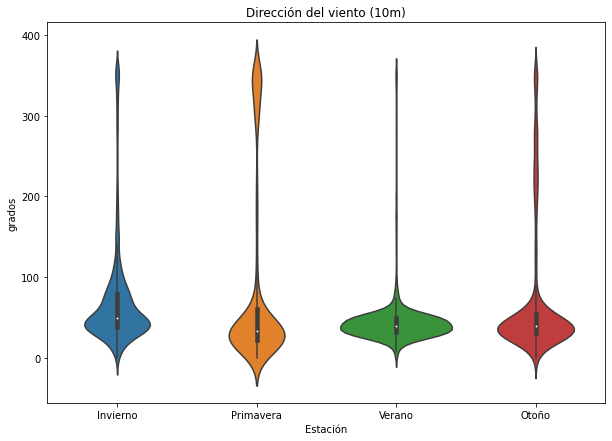

In [24]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Season", y="WD_10m_º", data=dataset)
plt.xlabel('Estación')
plt.ylabel('grados')
plt.title('Dirección del viento (10m)')

plt.savefig('fig/' + 'Seasonal_Violinplot_WindDirection.png', dpi=200)        
plt.show()

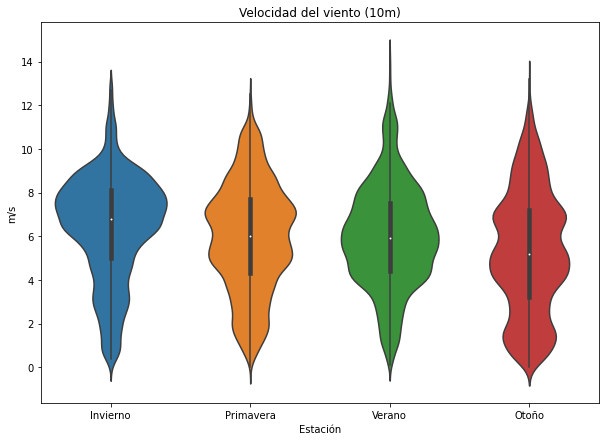

In [25]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Season", y="WS_10m_ms", data=dataset)
plt.xlabel('Estación')
plt.ylabel('m/s')
plt.title('Velocidad del viento (10m)')

plt.savefig('fig/' + 'Seasonal_Violinplot_WindSpeed.png', dpi=200)
plt.show()

A diferencia de la Península Ibérica, la isla de Tenerife no presenta gran variabilidad en cuanto al comportamiento del viento para cada estación del año. Esto es posiblemente debido a que las islas canarias tiene un clima subtropical, suave y que apenas presenta contrastes estacionales en el año.

### 2. Análisis velocidad del viento VS dirección 

A continuación se analiza la correlación existente entre la velocidad y la dirección del viento para la ubicación escogida.

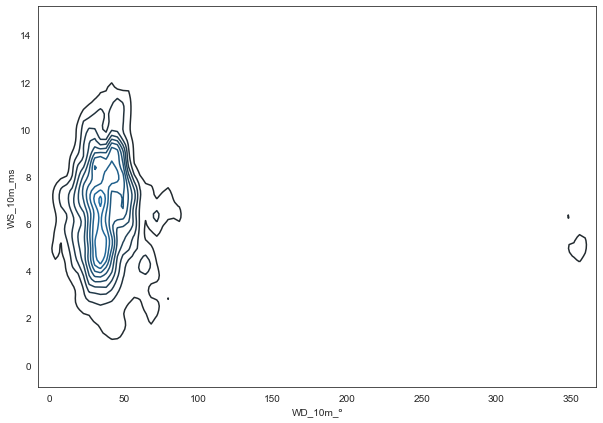

In [26]:
plt.figure(figsize=(10,7))
sns.set_style("white")
sns.kdeplot(dataset['WD_10m_º'],dataset['WS_10m_ms'])


### 3. Análisis estacionario irradiancia solar y nubosidad

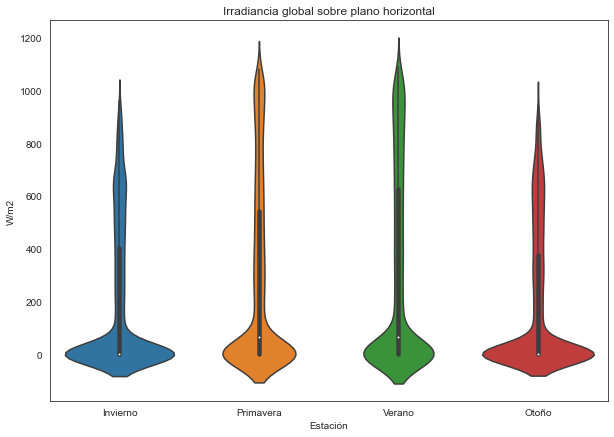

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Season", y="GHI_Wm2", data=dataset)
plt.xlabel('Estación')
plt.ylabel('W/m2')
plt.title('Irradiancia global sobre plano horizontal')

plt.savefig('fig/' + 'Seasonal_Violinplot_Irradiation.png', dpi=200)        
plt.show()

#plt.savefig('fig/' + 'Boxplot_Outliers.png', dpi=200)


A diferencia de la Península Ibérica, la isla de Tenerife no presenta gran variabilidad en cuanto al comportamiento del sol para cada estación del año. Esto es posiblemente debido a que las islas canarias tiene un clima subtropical, suave y que apenas presenta contrastes estacionales en el año.
 

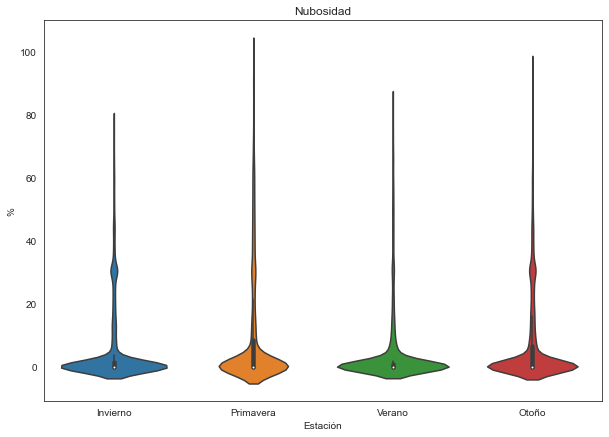

In [28]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Season", y="Nubosidad_%", data=dataset)
plt.xlabel('Estación')
plt.ylabel('%')
plt.title('Nubosidad')

plt.savefig('fig/' + 'Seasonal_Violinplot_Clouds.png', dpi=200)        
plt.show()

#plt.savefig('fig/' + 'Boxplot_Outliers.png', dpi=200)


### 4. Análisis estacionario temperaturas

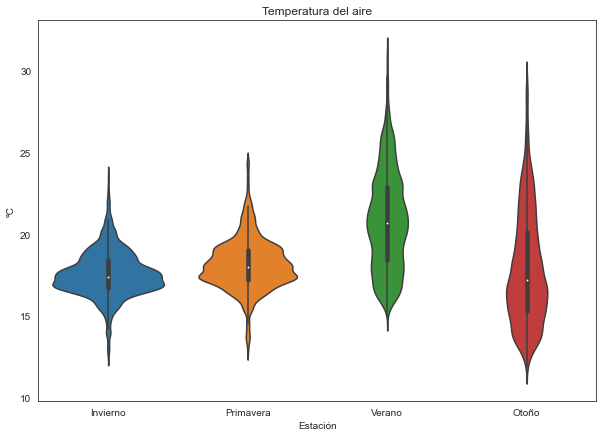

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Season", y="Temp_Aire_ºC", data=dataset)
plt.xlabel('Estación')
plt.ylabel('ºC')
plt.title('Temperatura del aire')

plt.savefig('fig/' + 'Seasonal_Violinplot_AirTemp.png', dpi=200)        
plt.show()

Con la temperatura del aire si que se aprecia una ligera estacionalidad, con valores más dispersos  en otoño y verano y más concentrados en invierno y primavera. También se observa un aumento en las temperaturas del aire en verano con un incremento de unos 5ºC del valor promedio respecto el resto de estaciones del año.

Pese a existir una variación en los valores de temperatura del aire según estación del año, todos los valores son bastante suaves debido al clima subtropical de las islas y no tienen un elevado impacto en el funcionamiento del sistema eléctrico de Tenerife.


In [30]:
# Guardamos el archivo en formato CSV y Pickle

def save_obj(obj, name ):
       with open('obj/'+ name + '.pkl', 'wb') as f:
           pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

save_obj(dataset, 'df_Tenerife_Meteo_28.14_-16.46_full_2019_clean+EDA')


dataset.to_csv('df_Tenerife_Meteo_28.14_-16.46_full_2019_clean+EDA.csv', index=True)